# DATA CLEANING AND CONTROL CODES

Import statements

In [3]:
# Import required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../datasets/customer_shopping_data_v0.csv")

sns.set_theme(style="whitegrid")

color1 = '#FF9E9D'  # Coral Pink
color2 = '#FFC785'  # Peach
color3 = '#FFF59D'  # Light Lemon
color4 = '#A0E6A6'  # Mint Green
color5 = '#87C8FF'  # Sky Blue
color6 = '#C4A2FF'  # Lavender

## Outlier Detection

Checks if there is an outlier in 'age' column

Age - Overall
  No outliers found.


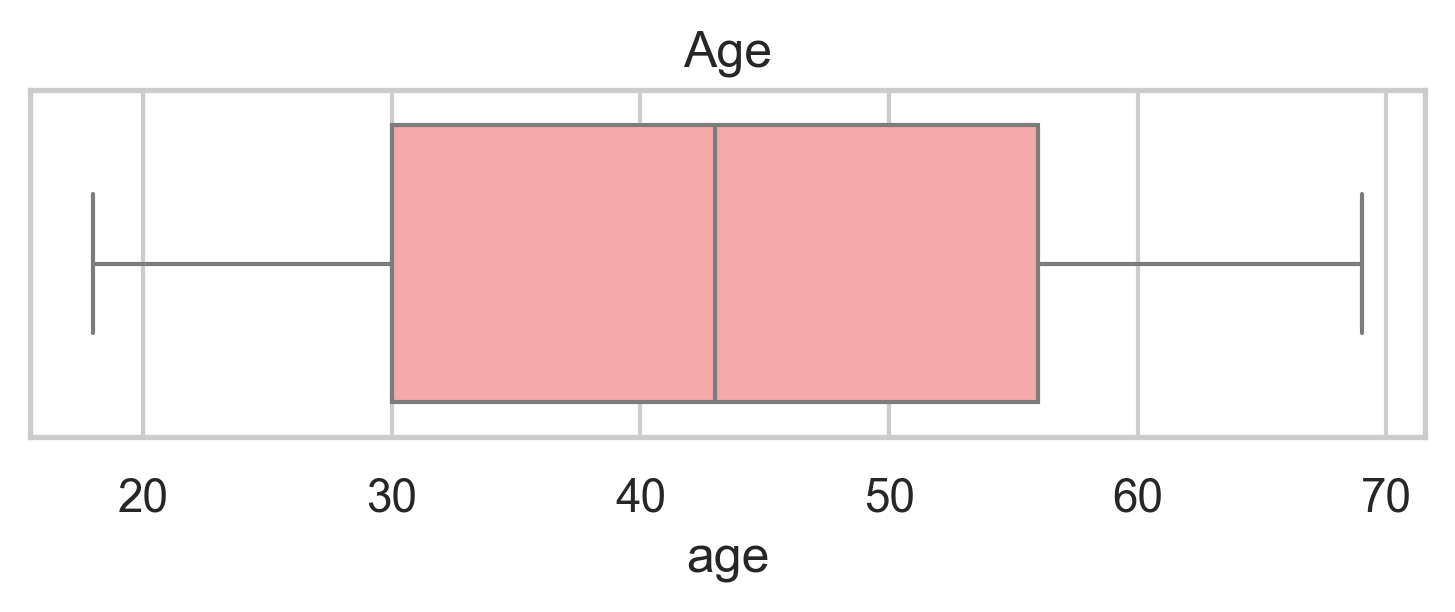

In [4]:
# Visualize data.
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

print("Age - Overall")
if outliers.empty:
    print("  No outliers found.")
else:
    print(f"  Outlier count: {len(outliers)}")
    display(outliers[['age']].head())

plt.figure(figsize=(6, 1.5), dpi=300)
sns.boxplot(x=df['age'], color=color1)
plt.title("Age")
plt.savefig("dataset_cleaning/age_boxplot.png", dpi=300)
plt.show()


Checks if there is an outlier in 'price' column for each product 'category'


Category: Clothing - price
  No outliers found.


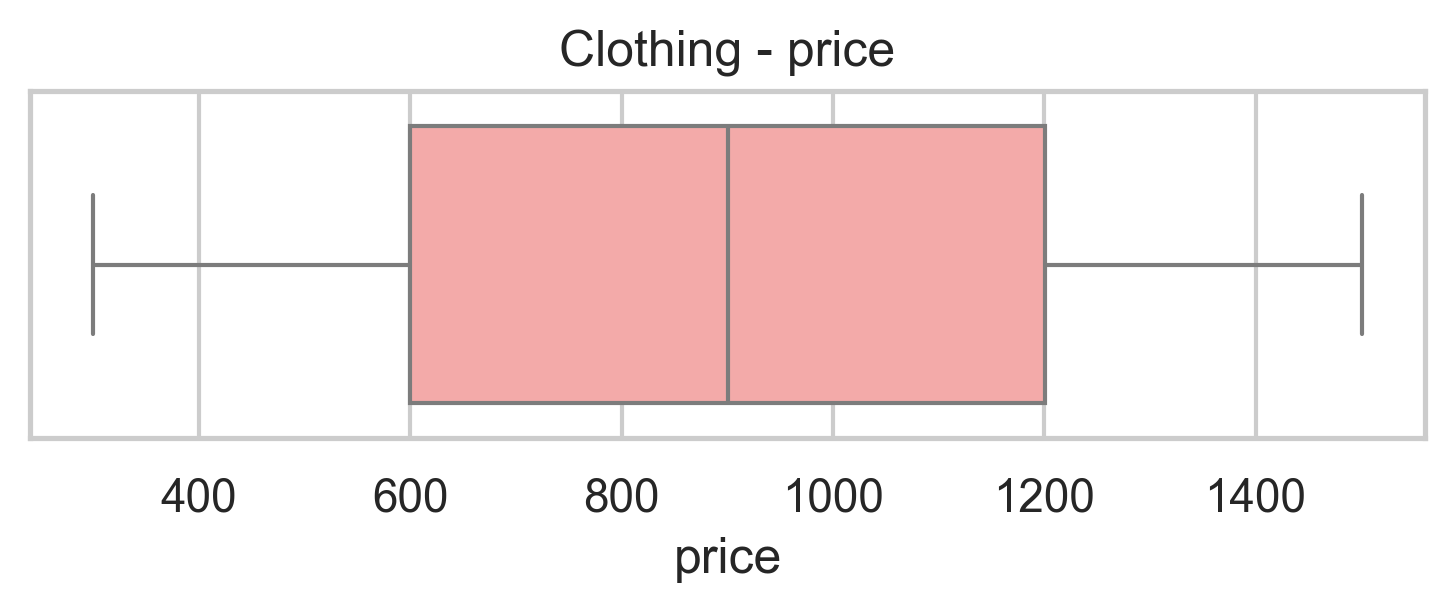


Category: Shoes - price
  No outliers found.


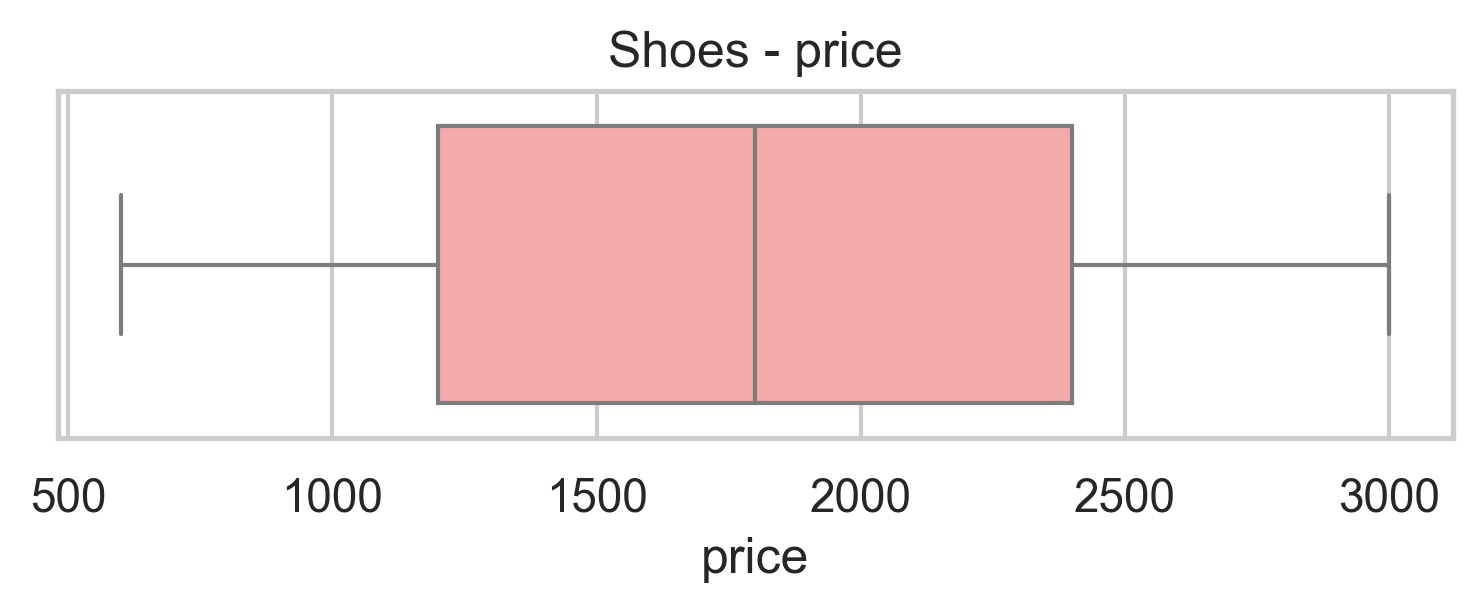


Category: Books - price
  No outliers found.


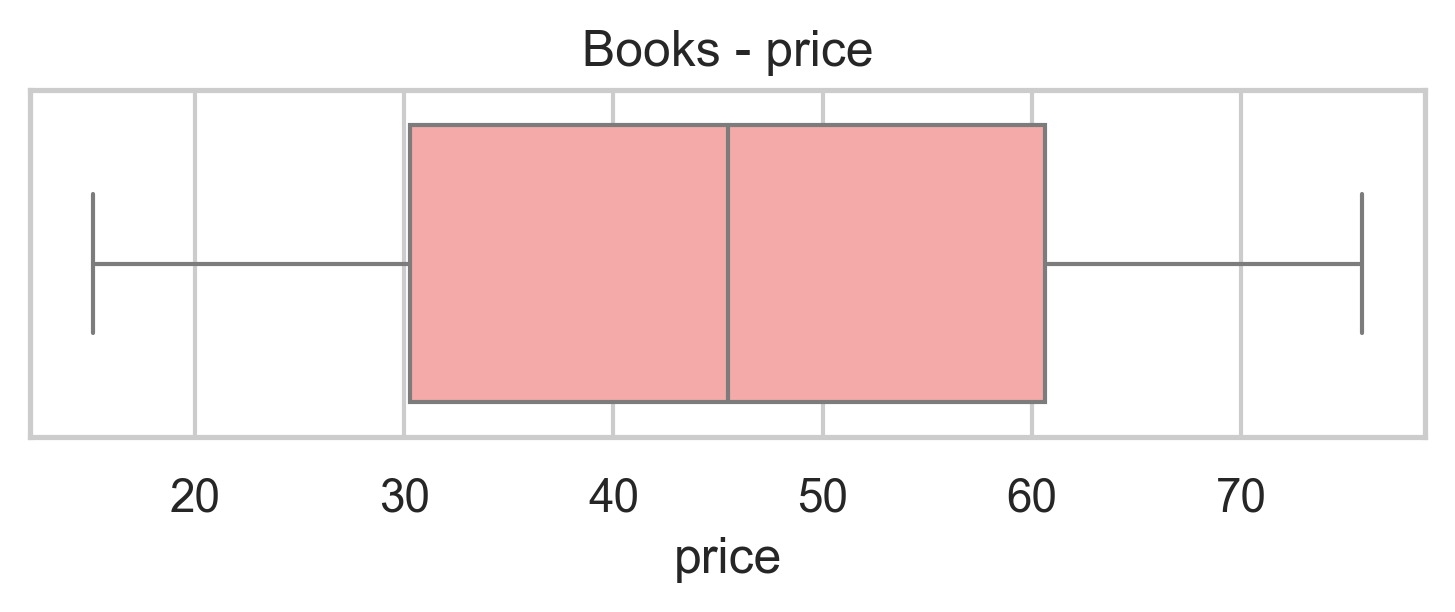


Category: Cosmetics - price
  No outliers found.


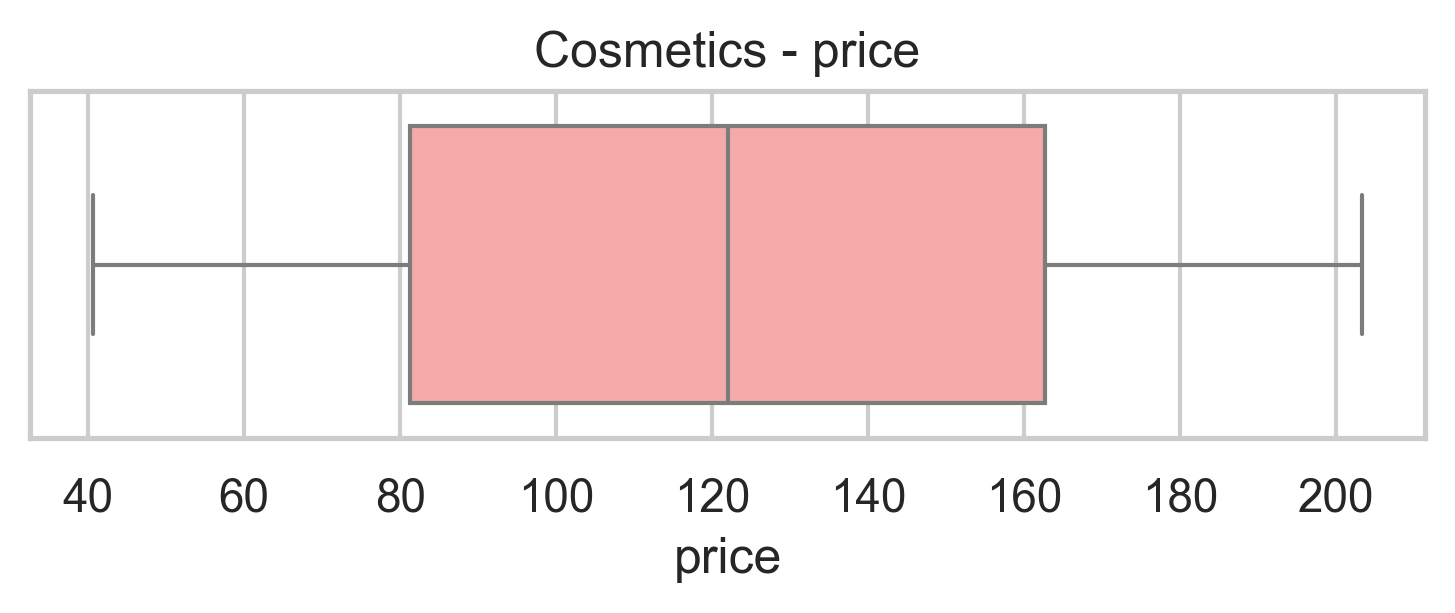


Category: Food & Beverage - price
  No outliers found.


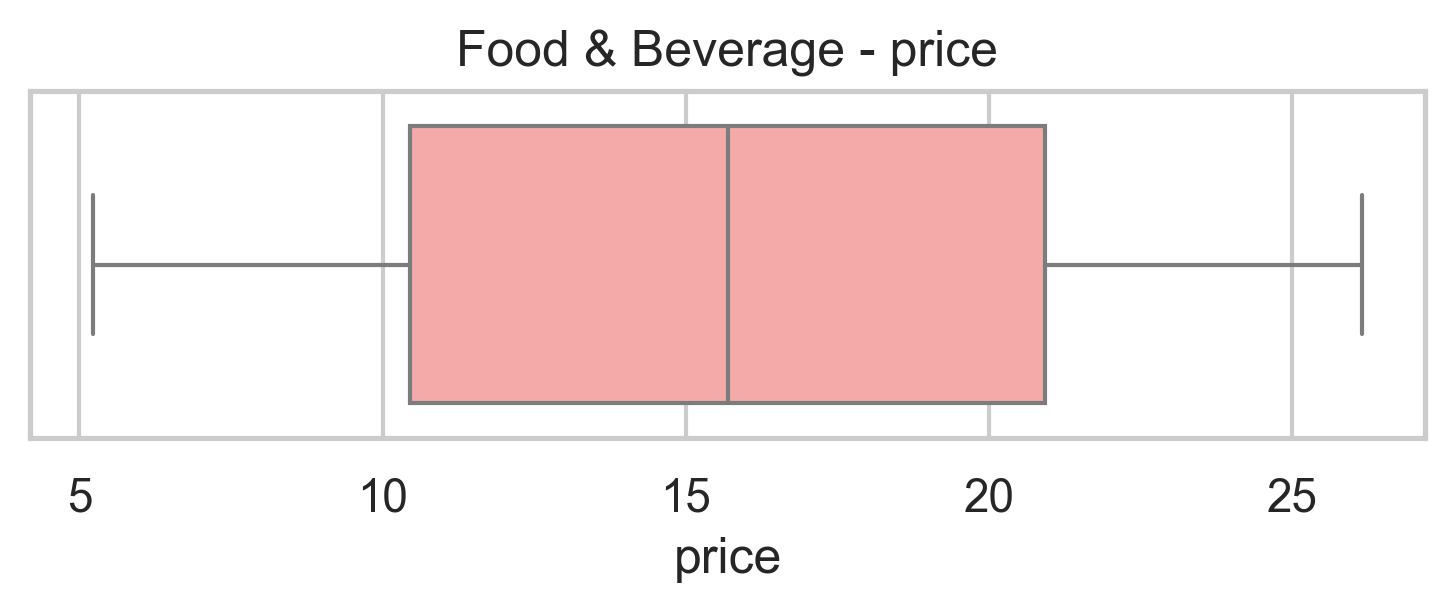


Category: Toys - price
  No outliers found.


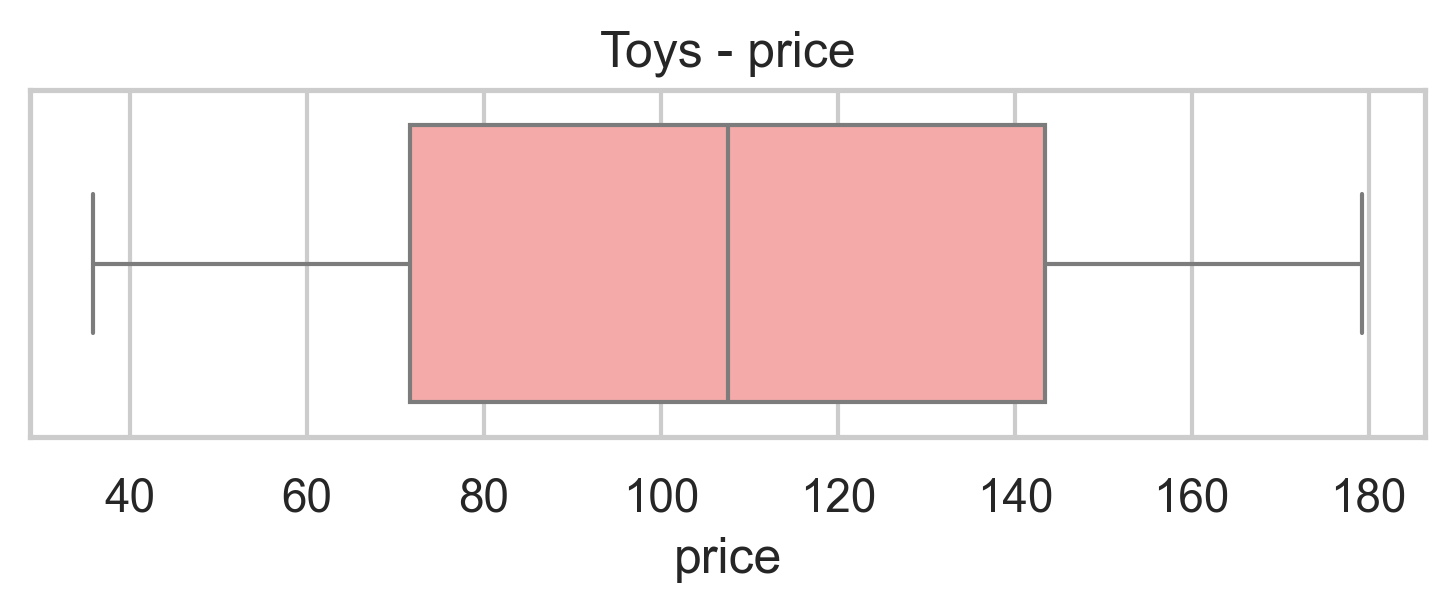


Category: Technology - price
  No outliers found.


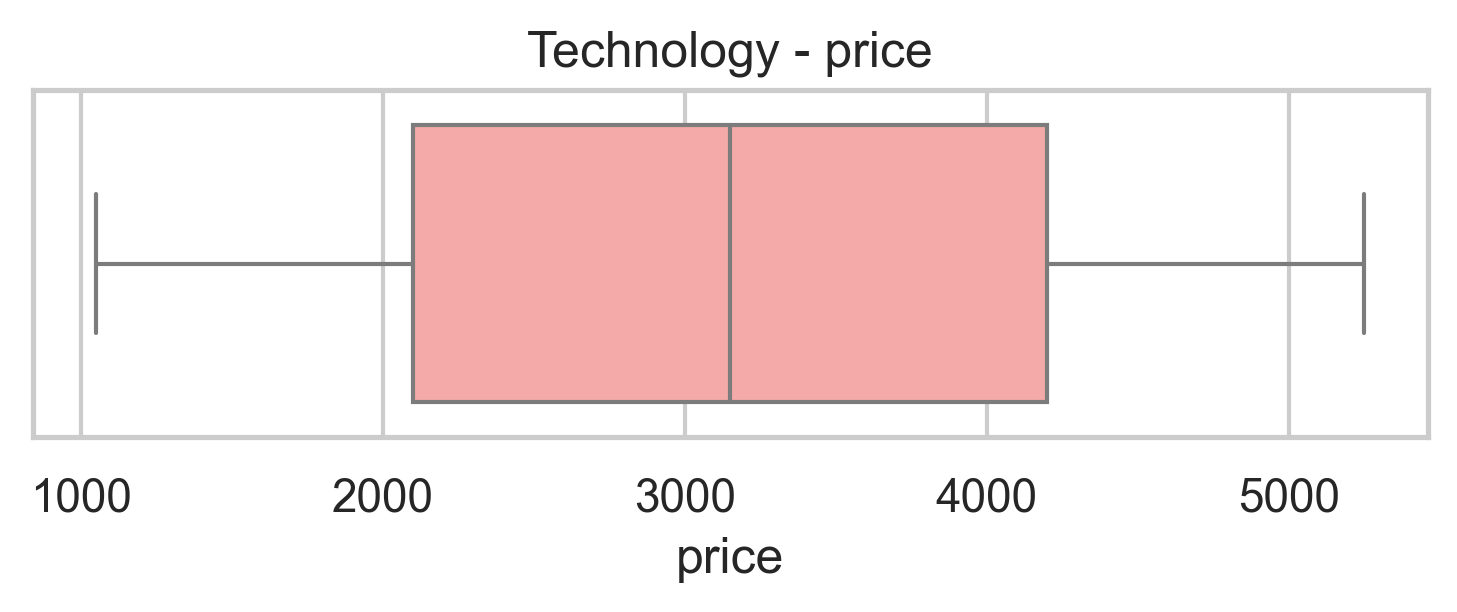


Category: Souvenir - price
  No outliers found.


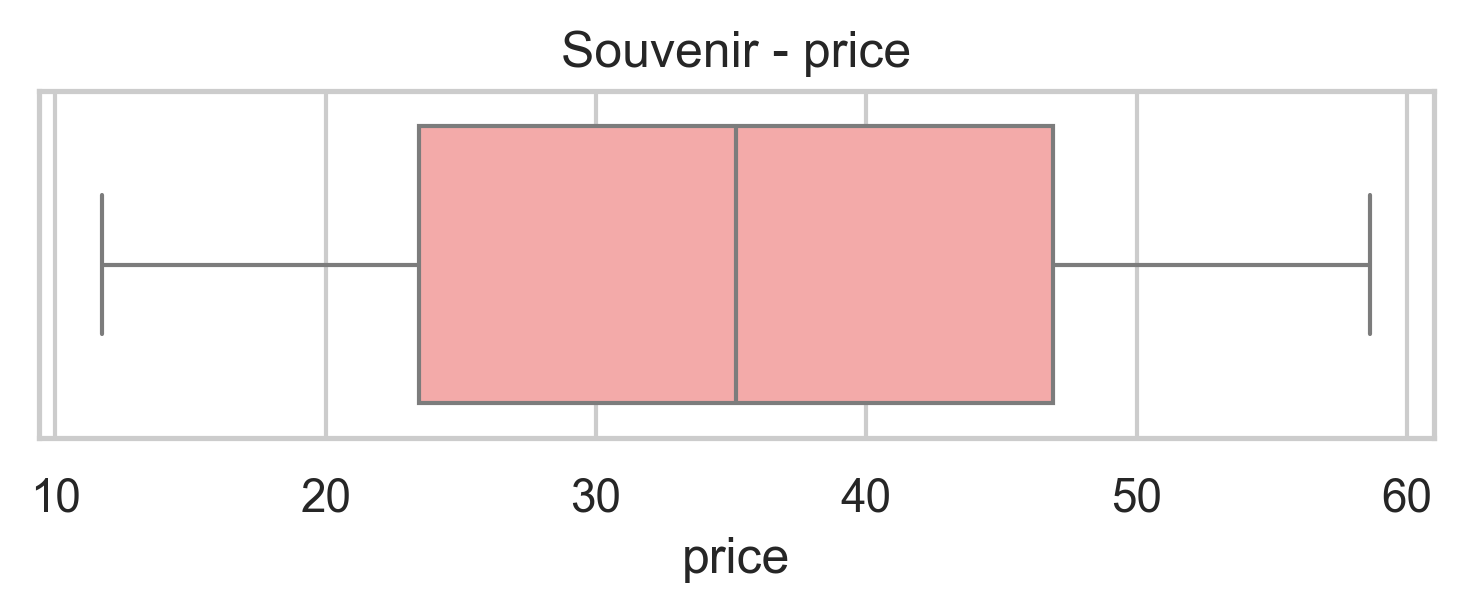

In [5]:
# Visualize data.
features = ['price']
categories = df['category'].unique()

for cat in categories:
    print(f"\nCategory: {cat} - price")
    cat_df = df[df['category'] == cat]
    
    Q1 = cat_df['price'].quantile(0.25)
    Q3 = cat_df['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cat_df[(cat_df['price'] < lower_bound) | (cat_df['price'] > upper_bound)]
    
    if outliers.empty:
        print("  No outliers found.")
    else:
        print(f"  Outlier count: {len(outliers)}")
        display(outliers[['price']].head())

    plt.figure(figsize=(6, 1.5), dpi=300)
    sns.boxplot(x=cat_df['price'], color=color1)
    plt.title(f"{cat} - price")
    plt.savefig(f"dataset_cleaning/category_price_{cat}_boxplot.png", dpi=300)
    plt.show()


Checks if there is an outlier in 'quantity' column for each category


Category: Clothing - quantity
  No outliers found.


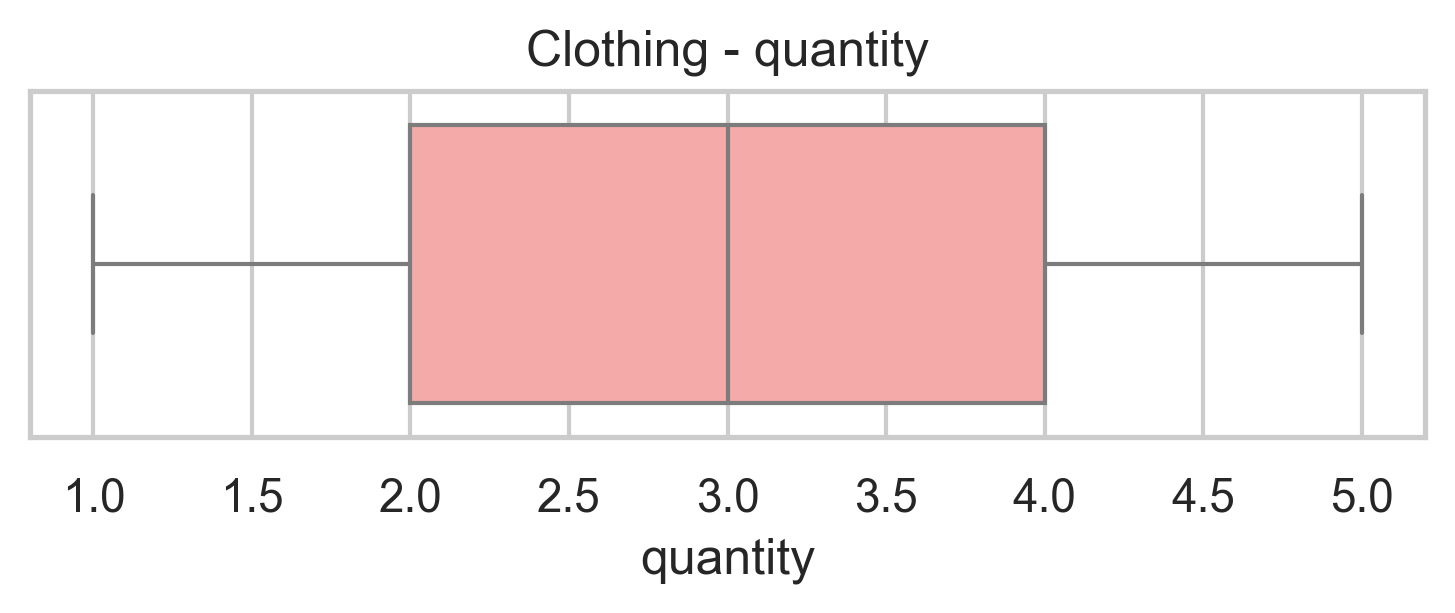


Category: Shoes - quantity
  No outliers found.


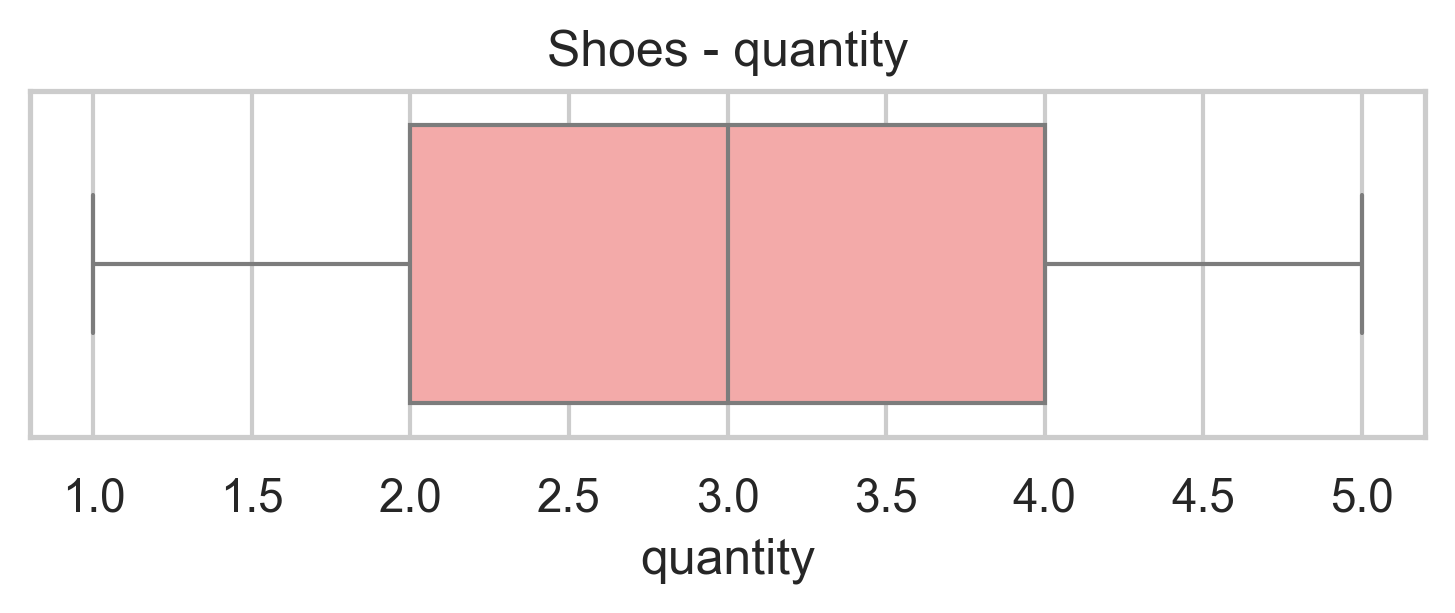


Category: Books - quantity
  No outliers found.


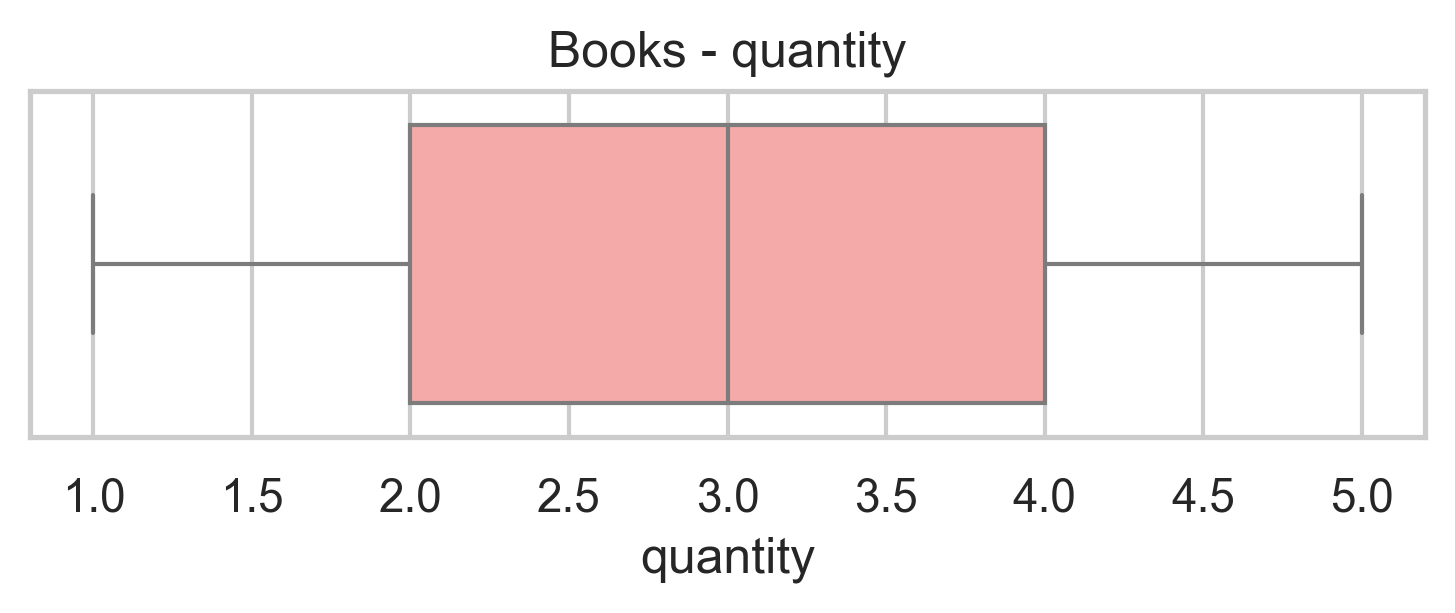


Category: Cosmetics - quantity
  No outliers found.


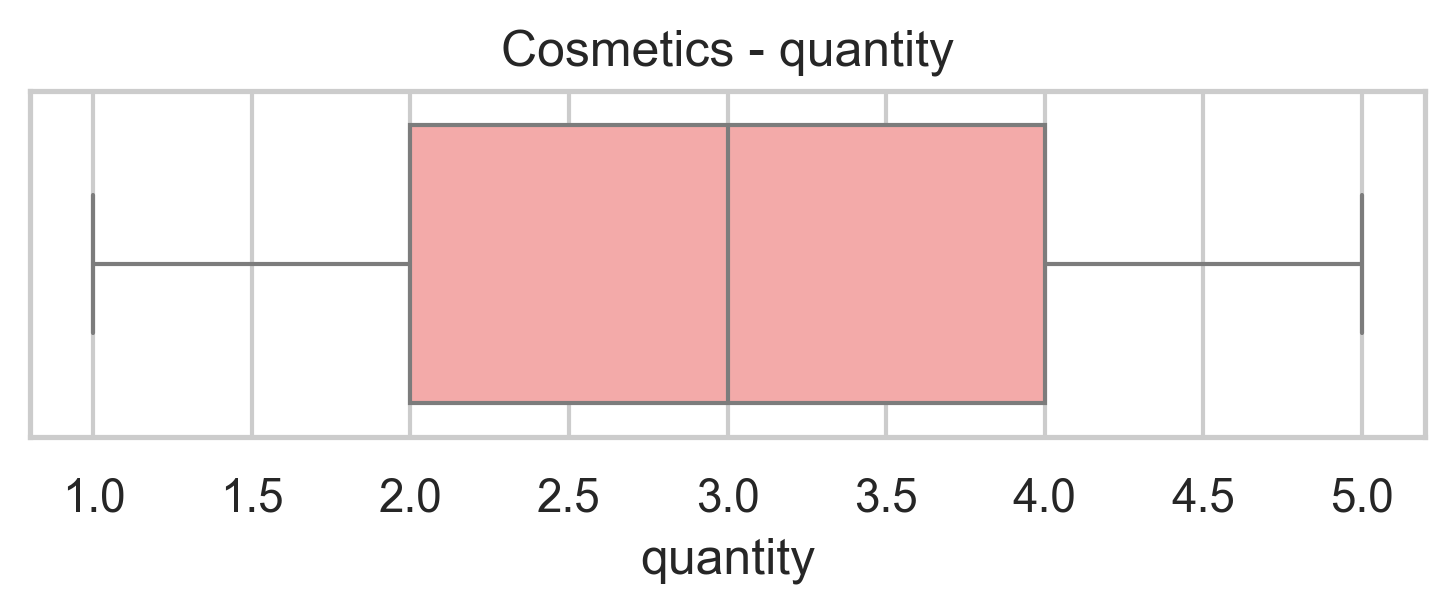


Category: Food & Beverage - quantity
  No outliers found.


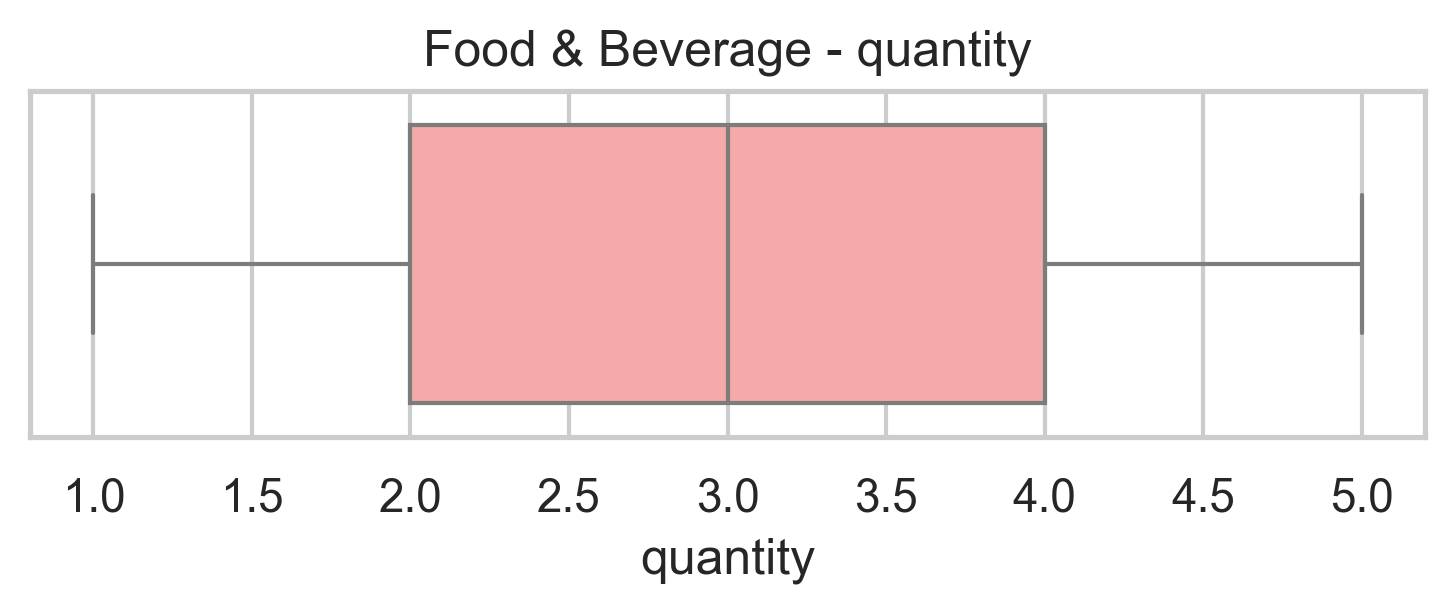


Category: Toys - quantity
  No outliers found.


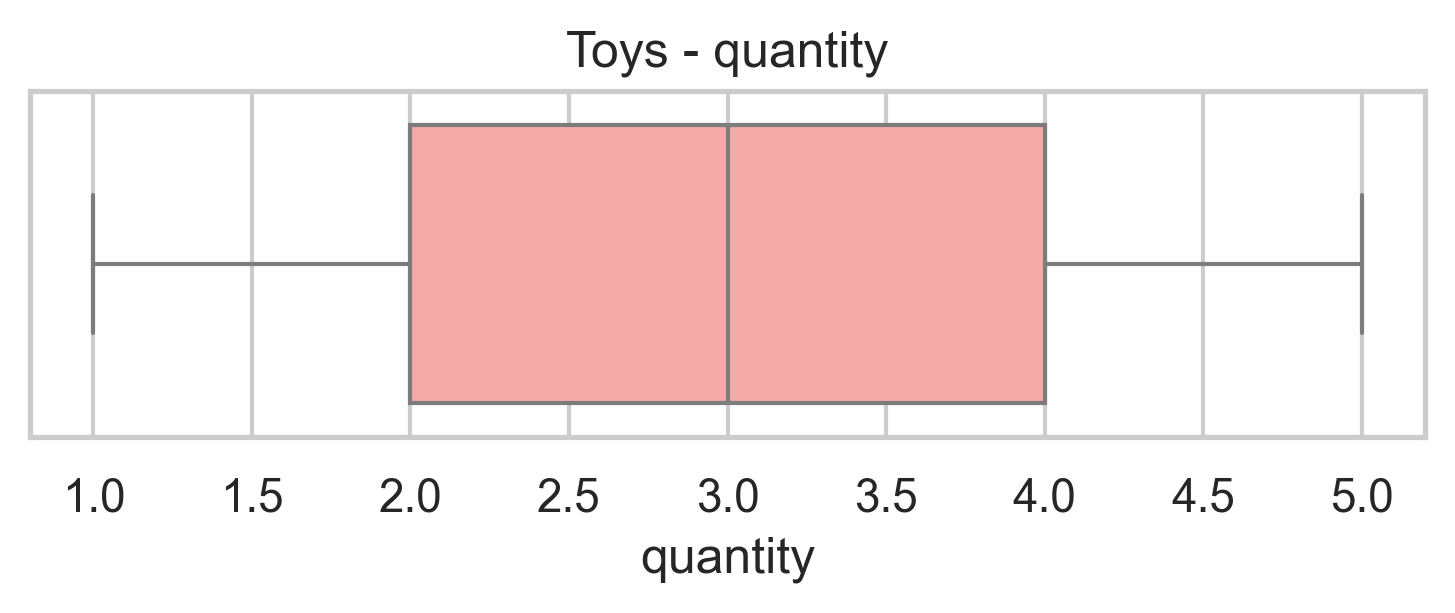


Category: Technology - quantity
  No outliers found.


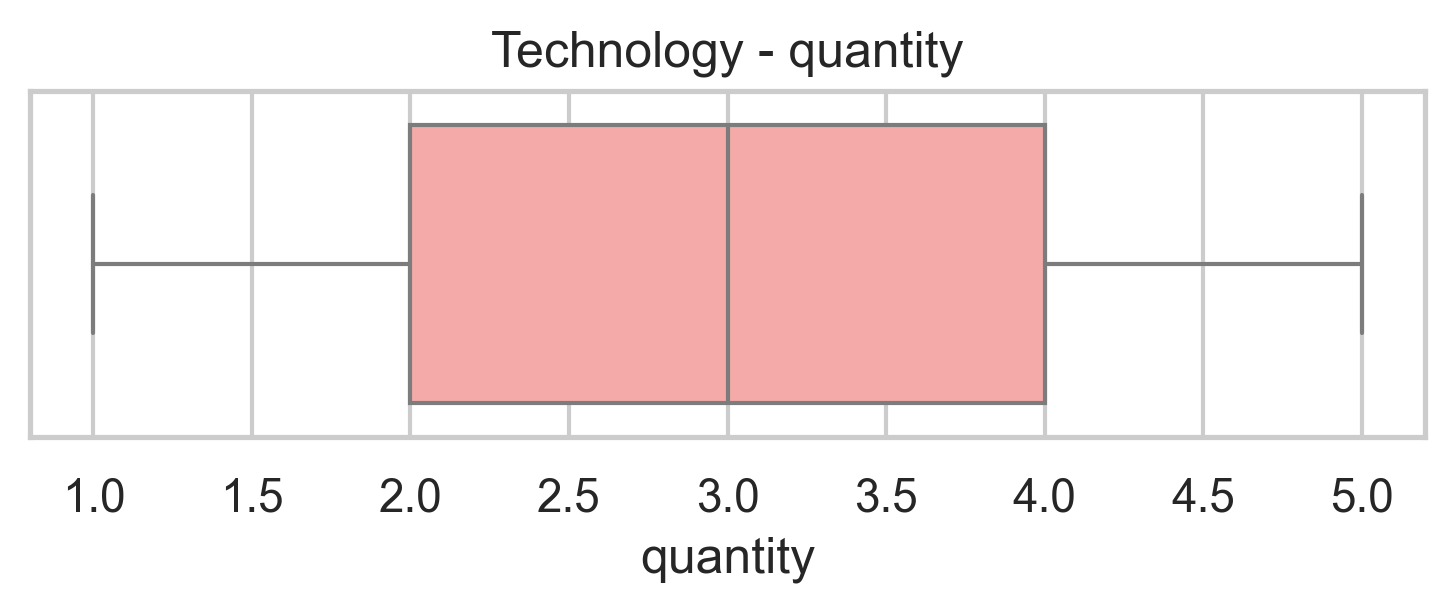


Category: Souvenir - quantity
  No outliers found.


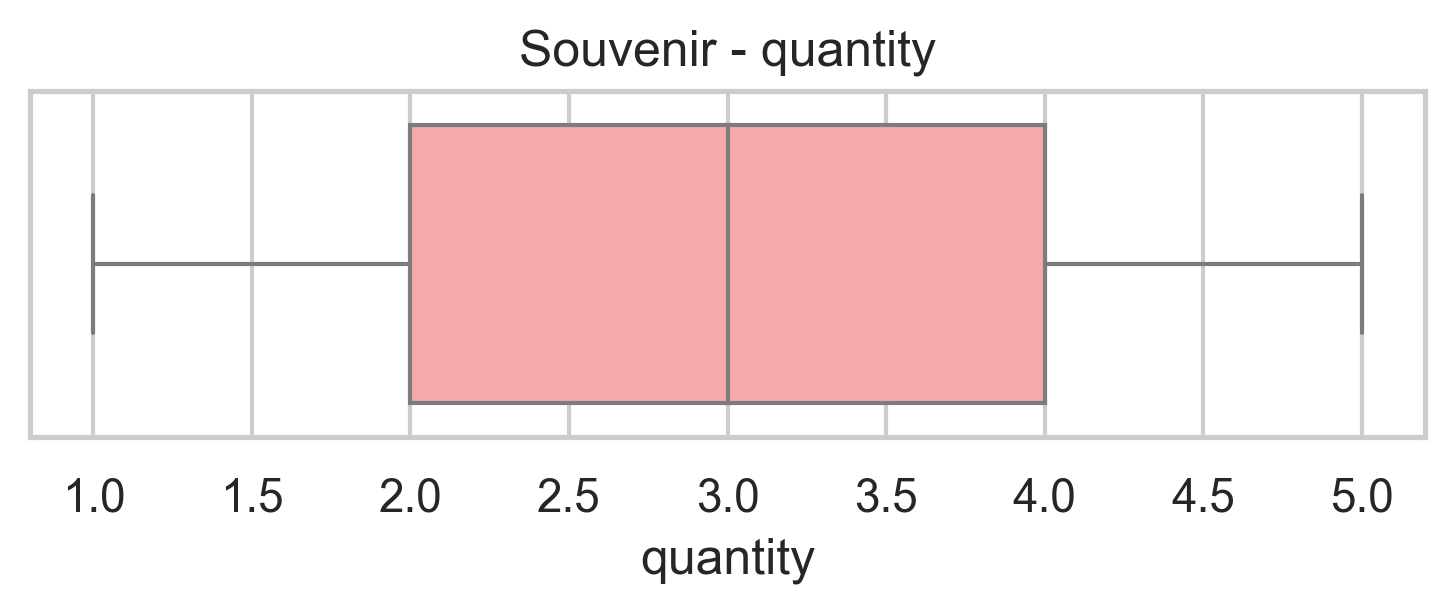

In [6]:
# Visualize data.
for cat in categories:
    print(f"\nCategory: {cat} - quantity")
    cat_df = df[df['category'] == cat]
    
    Q1 = cat_df['quantity'].quantile(0.25)
    Q3 = cat_df['quantity'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cat_df[(cat_df['quantity'] < lower_bound) | (cat_df['quantity'] > upper_bound)]
    
    if outliers.empty:
        print("  No outliers found.")
    else:
        print(f"  Outlier count: {len(outliers)}")
        display(outliers[['quantity']].head())

    plt.figure(figsize=(6, 1.5), dpi=300)
    sns.boxplot(x=cat_df['quantity'], color=color1)
    plt.title(f"{cat} - quantity")
    plt.savefig(f"dataset_cleaning/category_quantity_{cat}_boxplot.png", dpi=300)
    plt.show()


Checks if there is any bad formatted value in columns

In [7]:
# Execute data processing step.
string_columns = df.select_dtypes(include='object').columns

for col in string_columns:
    print(f"\nUnique values in column '{col}':")
    print(df[col].unique())


Unique values in column 'invoice_no':
['I138884' 'I317333' 'I127801' ... 'I824010' 'I702964' 'I232867']

Unique values in column 'customer_id':
['C241288' 'C111565' 'C266599' ... 'C103292' 'C800631' 'C273973']

Unique values in column 'gender':
['Female' 'Male']

Unique values in column 'category':
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']

Unique values in column 'payment_method':
['Credit Card' 'Debit Card' 'Cash']

Unique values in column 'invoice_date':
['5/8/2022' '12/12/2021' '9/11/2021' '16/05/2021' '24/10/2021'
 '24/05/2022' '13/03/2022' '13/01/2021' '4/11/2021' '22/08/2021'
 '25/12/2022' '28/10/2022' '31/07/2022' '17/11/2022' '3/6/2022'
 '7/11/2021' '16/01/2021' '5/1/2022' '26/07/2021' '7/3/2023' '15/02/2023'
 '1/5/2021' '18/06/2022' '26/10/2021' '16/12/2022' '20/04/2022'
 '10/10/2022' '23/08/2022' '29/04/2021' '4/7/2022' '21/11/2021'
 '23/02/2022' '11/7/2021' '30/08/2022' '4/1/2023' '21/06/2022' '8/7/2022'
 '27/02/2022' '19/12

## Duplicate Data Object Check

Cheks if there is dublicate data object by their 'invoice_no'

In [8]:
# Execute data processing step.
duplicate_invoices = df[df.duplicated('invoice_no', keep=False)]

if duplicate_invoices.empty:
    print("No duplicate invoice_no found.")
else:
    print(f"Number of duplicated invoice_no entries: {duplicate_invoices['invoice_no'].nunique()}")
    display(duplicate_invoices.sort_values('invoice_no'))

No duplicate invoice_no found.


## Logical Error Detection

Cheks if there is any logical error in 'age', 'quantity' 'price', 'date' columns (errors mentioned in the code)

In [9]:
# age < 0 or > 120?
age_errors = df[(df['age'] < 0) | (df['age'] > 120)]
if age_errors.empty:
    print("No invalid age values found.")
else:
    print("Invalid age values found:")
    display(age_errors.head())

# quantity ≤ 0?
quantity_errors = df[df['quantity'] <= 0]
if quantity_errors.empty:
    print("No invalid quantity values found.")
else:
    print("Invalid quantity values found:")
    display(quantity_errors.head())

# price < 0?
price_errors = df[df['price'] < 0]
if price_errors.empty:
    print("No negative prices found.")
else:
    print("Negative price values found:")
    display(price_errors.head())

# date > 2025?
date_errors = df[pd.to_datetime(df['invoice_date'], dayfirst=True) > pd.to_datetime('2025-12-31')]
if date_errors.empty:
    print("No future dates found.")
else:
    print("Dates beyond 2025 found:")
    display(date_errors.head())


No invalid age values found.
No invalid quantity values found.
No negative prices found.
No future dates found.
